## Imports

In [18]:
import numpy as np
import imageio
import cv2
import json
import matplotlib.pyplot as plt

## Seeding

Assumes pre-defined mask listed in mask_notebook. Can be updated directly on the file 

## Main Program

Loads image

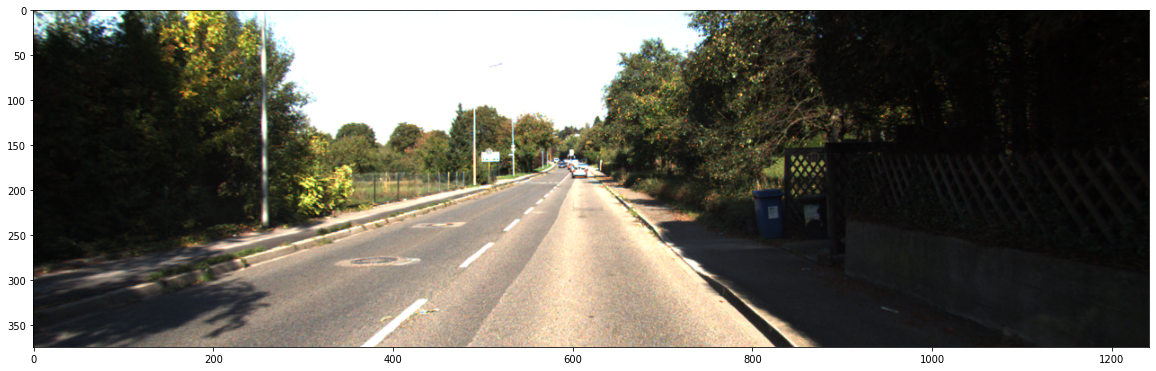

In [20]:
# Load image
image_path = "dataset_examples/um_000052.png"
image = imageio.imread(image_path)
plt.figure(figsize=(15, 15))
plt.imshow(image)

## Image Pre-processing

Applies a series of transformations to input image in order to 

In [52]:
# Select bottom half of the image and convert it to HSV
image_height = image.shape[0]
cropped_image = image[image_height // 2: image_height, :, :]
hsv_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)

In [54]:
masked_images = []
with open("mask.json") as masks_file:
    # Load masks dictionary
    masks = json.load(masks_file)
    for mask in masks:
        # Apply each mask individually
        min_range = np.array(mask["min"])
        max_range = np.array(mask["max"])
        masked_images.append(cv2.inRange(hsv_image, min_range, max_range))

# Merge all masks into a single one
masked_image = np.sum(masked_images, axis=0) / len(masked_images)
masked_image[masked_image != 0] = 255
masked_image = np.uint8(masked_image)

In [55]:
blurred_image = cv2.GaussianBlur(masked_image, (3, 3), 0)
kernel = np.ones([5, 5], np.uint8)
closed_masked_image = cv2.erode(cv2.dilate(blurred_image, kernel), kernel)
canny_image = cv2.Canny(closed_masked_image, 50, 150)
edged_image = cv2.erode(cv2.dilate(blurred_image, kernel), kernel)

Show all processed images

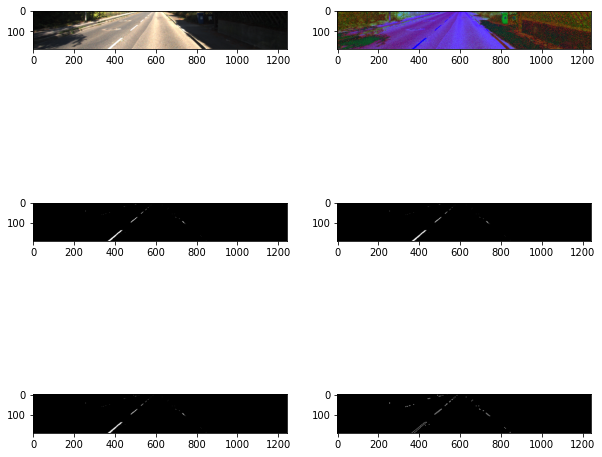

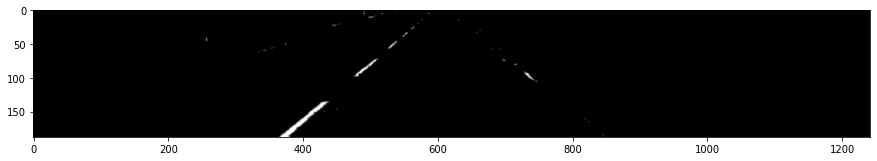

In [63]:
f, axarr = plt.subplots(3, 2, figsize=(10, 10))
axarr[0, 0].imshow(cropped_image)
axarr[0, 1].imshow(hsv_image)
axarr[1, 0].imshow(masked_image, cmap="gray")
axarr[1, 1].imshow(blurred_image, cmap="gray")
axarr[2, 0].imshow(closed_masked_image, cmap="gray")
axarr[2, 1].imshow(canny_image, cmap="gray")
plt.figure(figsize=(15, 15))
plt.imshow(edged_image, cmap="gray")

## Contour processing

Find contours in image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


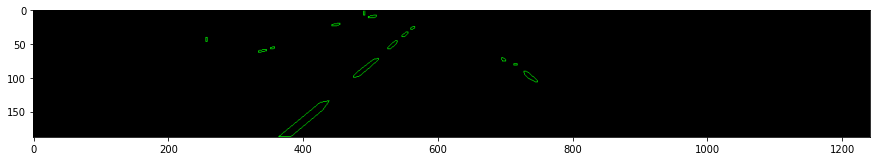

In [64]:
contours, _ = cv2.findContours(edged_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont_image = np.zeros([edged_image.shape[0], edged_image.shape[1], 3])
approximated_contours = []

for contour in contours:
    if cv2.contourArea(contour) < 10: continue

    epsilon = 0.01 * cv2.arcLength(contour, True)
    approximated_contour = cv2.approxPolyDP(contour, epsilon, True)
    convex_contour = cv2.convexHull(approximated_contour)
    approximated_contours.append(convex_contour)
    cv2.drawContours(cont_image, [convex_contour], -1, (0, 255, 0), 1)

plt.figure(figsize=(15, 15))
plt.imshow(cont_image)

## Lane Detection

Applies lane detection algorithm 

## Lane Detection

Applies lane detection algorithm 